In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style(style='whitegrid')

In [4]:
df_housing = pd.read_csv('boston_house_price_data.csv')

In [10]:
# get info like total rows, total columns and their data types, missing valeus
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [11]:
# get stats info
df_housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
df_housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


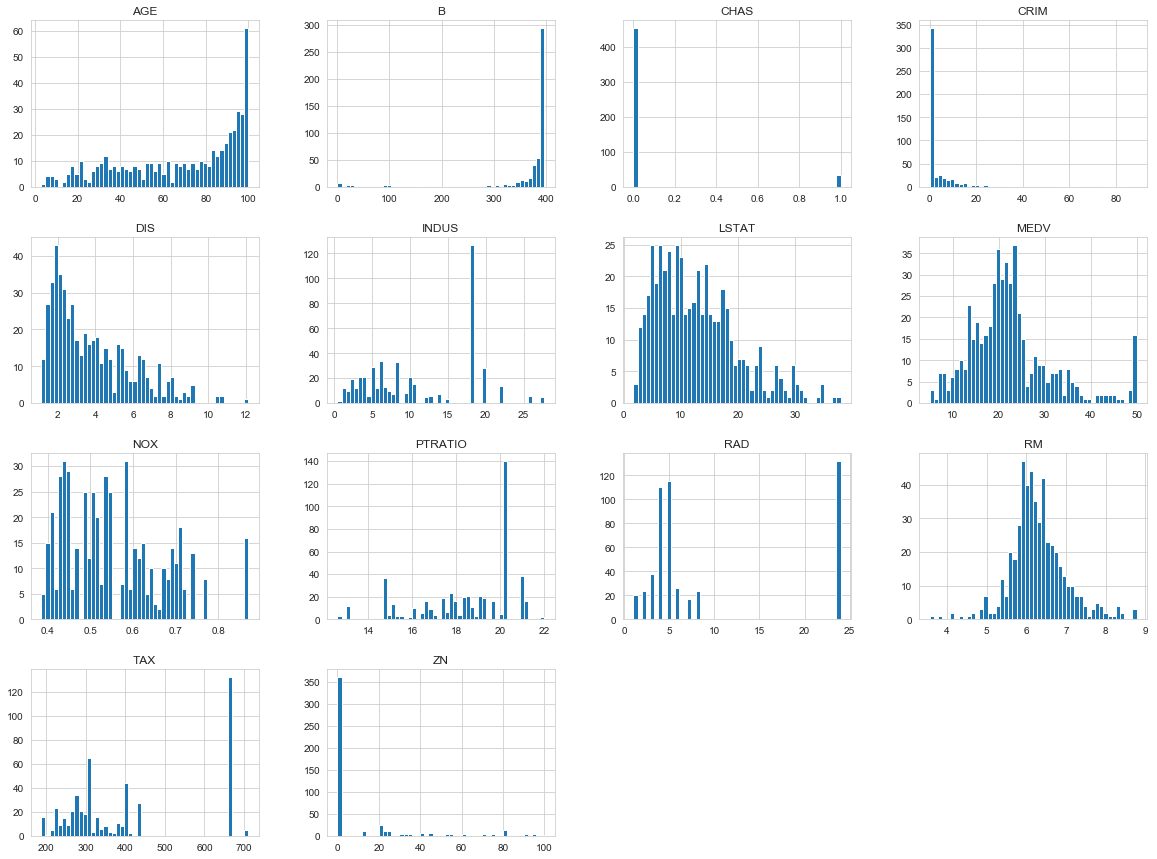

In [13]:
df_housing.hist(figsize=(20,15), bins=50)
plt.show()

### Check for outliers

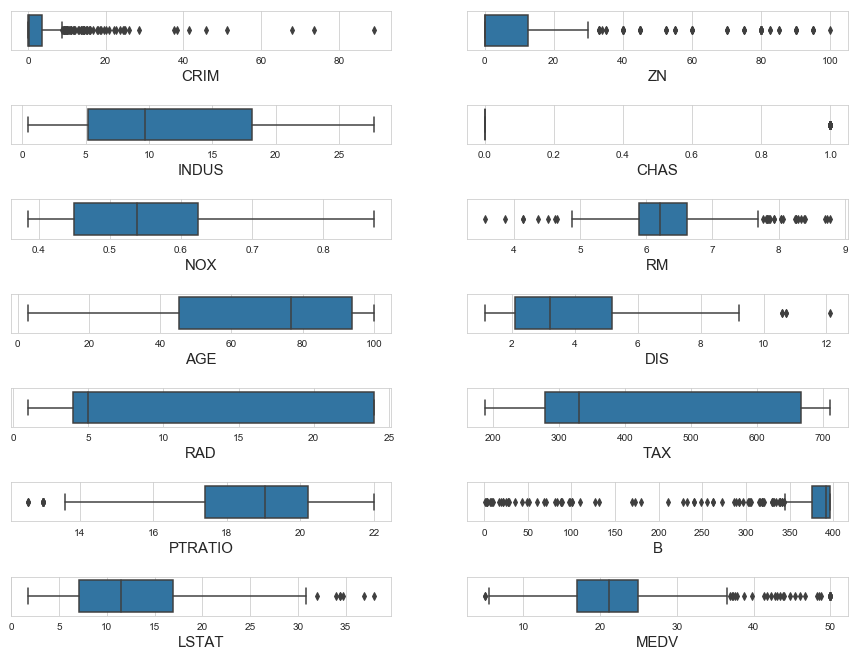

In [14]:
plt.figure(figsize=(15,12))
i=1
flag = False
cols = df_housing.columns
for col in cols:
    plt.subplot(len(cols),2,i)
    sns.boxplot(df_housing[col])
    plt.xlabel(s=col,size=15)
    
    if i % 2 == 0: i += 3 
    else: i += 1

### Remove outliers

In [15]:
def remove_outliers(df, cols):
    tot_ol_index = set()
    
    for col in cols:
        srt_values = df[df[col].isnull() == False][col].sort_values().values
        Q1, Q2, Q3 = np.quantile(srt_values,[0.25,0.5,0.75])
        IQR = Q3 - Q1
        lw_lim = Q1 - (1.5 * IQR)
        up_lim = Q3 + (1.5 * IQR)

        ids = df[(df[col] < lw_lim) | (df[col] > up_lim)][col].index.values
        tot_ol_index.update(ids)
        pass        
    return tot_ol_index, df[~df.index.isin(tot_ol_index)]

In [16]:
cols = list(df_housing.drop('CHAS', axis=1).columns)

In [17]:
tot_ol_ids, df = remove_outliers(df_housing, cols)

In [18]:
len(tot_ol_ids)

214

In [19]:
df.shape

(292, 14)

In [21]:
df_housing.shape

(506, 14)

### Checking for missing values and scaling dataset

In [22]:
df.isnull().sum().sort_values(ascending=False)

INDUS      14
LSTAT      12
AGE        11
CHAS       11
ZN         10
CRIM        8
MEDV        0
B           0
PTRATIO     0
TAX         0
RAD         0
DIS         0
RM          0
NOX         0
dtype: int64

In [23]:
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion

In [24]:
class DataFrameSelector():
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.features].values

In [25]:
cols_cat = ['CHAS']
cols_num = list(df_housing.columns.drop(['MEDV','CHAS']))

In [26]:
cat_ppl = Pipeline([
                        ('data_frame_selector', DataFrameSelector(cols_cat)),
                        ('imputer', Imputer(strategy='most_frequent')), 
                ])

num_ppl = Pipeline([
                        ('data_frame_selector', DataFrameSelector(cols_num)),
                        ('imputer', Imputer(strategy='median')),
                        ('std_scaler', StandardScaler())
                ])

full_ppl = FeatureUnion(transformer_list=[
                                            ('cat_ppl', cat_ppl),
                                            ('num_ppl', num_ppl)
                                        ])

In [27]:
prepared_data = full_ppl.fit_transform(df)

In [28]:
cols_all = cols_cat + cols_num
df_prepared = pd.DataFrame(data=prepared_data, columns=cols_all)
df_prepared.head()

,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0,-0.520621,1.756789,-1.348057,0.027446,0.918594,-0.047080,0.055799,-0.899533,-0.468708,-1.968101,0.701976,-1.339965
1,0.0,-0.509409,-0.432585,-0.557917,-0.666213,0.567502,0.483000,0.556424,-0.752382,-0.853554,-0.534541,0.701976,-0.560778
2,0.0,-0.509419,-0.432585,-0.557917,-0.666213,2.309281,-0.205716,0.556424,-0.752382,-0.853554,-0.534541,0.338195,-1.517905
3,0.0,-0.506706,-0.432585,-1.369636,-0.776796,1.882955,-0.797703,1.181476,-0.605232,-0.996090,-0.018460,0.499081,-1.722067
4,0.0,-0.487112,-0.432585,-1.369636,-0.776796,2.222648,-0.472691,1.181476,-0.605232,-0.996090,-0.018460,0.701976,-0.144962


### Concatination of both prepared data and target(MEDV)


Here total no. of rows(291) are equal in both but index is different.

-> prepared data set have index range from 0 to 292

-> target(MEDV) have original dataset index 0 to 505(outliers are removed). It will put empty rows for unmatching indexes.

1. reset index of target(MEDV) same as prepared data from 0 to 292
2. concat two data set and make final dataframe.

In [29]:
print('shape: ', df_prepared.shape)
print('index: ', df_prepared.index)

shape:  (292, 13)
index:  RangeIndex(start=0, stop=292, step=1)


In [30]:
print('shape: ', df['MEDV'].shape)
print('index: ', df['MEDV'].index)

shape:  (292,)
index:  Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            496, 497, 498, 499, 500, 501, 502, 503, 504, 505],
           dtype='int64', length=292)


In [31]:
# creating index range from o to 291
new_index = [i for i in range(292)]

In [32]:
sub_df = df[['MEDV']]

In [33]:
sub_df.set_index(pd.Series(new_index), inplace = True)

In [34]:
sub_df.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            282, 283, 284, 285, 286, 287, 288, 289, 290, 291],
           dtype='int64', length=292)

In [35]:
df_final = pd.concat([df_prepared,sub_df], axis=1)
df_final.head()

,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0,-0.520621,1.756789,-1.348057,0.027446,0.918594,-0.047080,0.055799,-0.899533,-0.468708,-1.968101,0.701976,-1.339965,24.0
1,0.0,-0.509409,-0.432585,-0.557917,-0.666213,0.567502,0.483000,0.556424,-0.752382,-0.853554,-0.534541,0.701976,-0.560778,21.6
2,0.0,-0.509419,-0.432585,-0.557917,-0.666213,2.309281,-0.205716,0.556424,-0.752382,-0.853554,-0.534541,0.338195,-1.517905,34.7
3,0.0,-0.506706,-0.432585,-1.369636,-0.776796,1.882955,-0.797703,1.181476,-0.605232,-0.996090,-0.018460,0.499081,-1.722067,33.4
4,0.0,-0.487112,-0.432585,-1.369636,-0.776796,2.222648,-0.472691,1.181476,-0.605232,-0.996090,-0.018460,0.701976,-0.144962,36.2


In [36]:
df_final.isnull().any()

CHAS       False
CRIM       False
ZN         False
INDUS      False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
MEDV       False
dtype: bool

### Checking correlation and multicollinearity

1. Using correation matrix
2. VIF

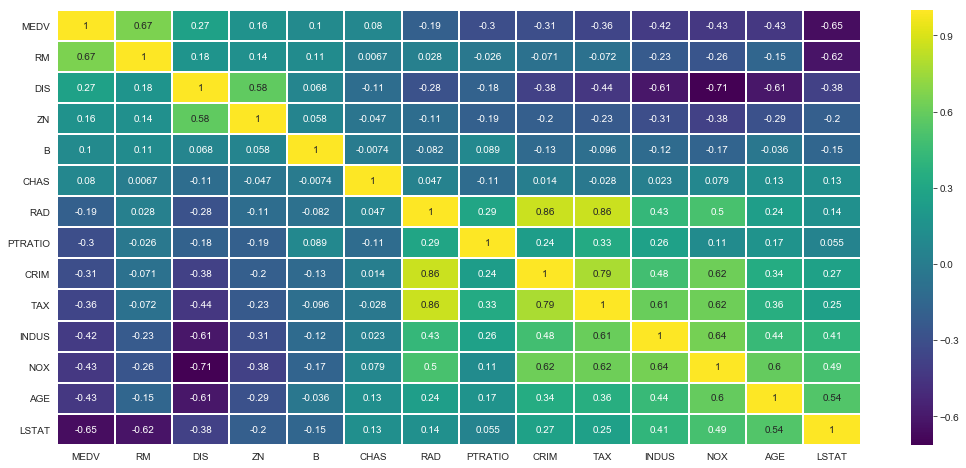

In [37]:
cols = df_final.corr()['MEDV'].sort_values(ascending=False).index
cm = df_final[cols].corr()

plt.figure(figsize=(18,8))
sns.heatmap(data=cm, annot=True, cmap='viridis', lw=1)
plt.show()

In [38]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#### Using Inbuilt function

vif > 5 means that feature is highly correlated with other features. So we need to remove those features.

1. get vif for all features
2. if highest vif is > 5 then remove respective feature and repeat from setp 1
3. try model building with different features.

In [39]:
def get_VIF_inbuilt(df):
    X = df.values
    vals = [round(variance_inflation_factor(X, i), 2) for i in range(X.shape[1])]
    vif_final = pd.Series(data=vals, index=df.columns, name='vif')
    return vif_final.sort_values(ascending=False)

In [40]:
get_VIF_inbuilt(df_final.drop('MEDV', axis=1))

RAD        7.65
TAX        5.76
CRIM       5.01
NOX        3.65
DIS        3.29
LSTAT      2.61
INDUS      2.32
AGE        2.20
RM         1.85
ZN         1.59
PTRATIO    1.27
CHAS       1.11
B          1.07
Name: vif, dtype: float64

In [41]:
# Here we need to remove highest vif feature(RAD) and try again with remaining

get_VIF_inbuilt(df_final.drop(['MEDV','RAD'], axis=1))

NOX        3.65
TAX        3.39
DIS        3.28
CRIM       2.93
LSTAT      2.60
INDUS      2.28
AGE        2.19
RM         1.84
ZN         1.57
PTRATIO    1.26
B          1.07
CHAS       1.06
Name: vif, dtype: float64

#### Calculating manually

In [42]:
def get_vif_manual(df):
    vif_vals = []
    cols = df.columns
    
    for i in range(0, len(cols)):
        y = df.loc[:, df.columns == cols[i]]
        x = df.loc[:, df.columns != cols[i]]
        
        model = sm.OLS(y, x)
        results = model.fit()
        rsq = results.rsquared
        vif = round(1 / (1 - rsq), 2)
        
        vif_vals.append(vif)
        pass
    
    vif_final = pd.Series(data=vif_vals, index=cols, name='vif')
    return vif_final.sort_values(ascending=False)

In [43]:
get_vif_manual(df_final.drop('MEDV', axis=1))

RAD        7.65
TAX        5.76
CRIM       5.01
NOX        3.65
DIS        3.29
LSTAT      2.61
INDUS      2.32
AGE        2.20
RM         1.85
ZN         1.59
PTRATIO    1.27
CHAS       1.11
B          1.07
Name: vif, dtype: float64

In [44]:
# removing feature 'RAD' and try with remaining
get_vif_manual(df_final.drop(['MEDV','RAD'], axis=1))

NOX        3.65
TAX        3.39
DIS        3.28
CRIM       2.93
LSTAT      2.60
INDUS      2.28
AGE        2.19
RM         1.84
ZN         1.57
PTRATIO    1.26
B          1.07
CHAS       1.06
Name: vif, dtype: float64

#### fully automatic function to remove multicollinearity

In [45]:
def remove_multicollinearity(df):
    cols_ignore = []
    flag = True

    while flag:
        vif_vals = []
        cols = df.columns
        for i in range(0, len(cols)):
            y = df.loc[:, df.columns == cols[i]]
            x = df.loc[:, df.columns != cols[i]]
            model = sm.OLS(y, x)
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            vif_vals.append(vif)
            pass #end for
        
        vif_final = pd.Series(data=vif_vals, index=cols, name='vif')
        vif_final = vif_final.sort_values(ascending=False)
        
        flag = False
        
        if vif_final[vif_final > 5].any():
            col_remove = vif_final.index[0]
            cols_ignore.append(col_remove)
            df.drop(col_remove, axis=1, inplace=True)
            flag = True
            pass #end if
        pass #end while
    
    return vif_final, cols_ignore

In [46]:
vif, cols_ignore = remove_multicollinearity(df_final.drop('MEDV', axis=1))

print('Ignore features: ', cols_ignore)
vif

Ignore features:  ['RAD']


NOX        3.65
TAX        3.39
DIS        3.28
CRIM       2.93
LSTAT      2.60
INDUS      2.28
AGE        2.19
RM         1.84
ZN         1.57
PTRATIO    1.26
B          1.07
CHAS       1.06
Name: vif, dtype: float64

##### Now we can build model on above listed features. Here is there's corr. with target column

In [47]:
dt = {'vif':vif, 'corr_with_target':round(cm['MEDV'][vif.index], 2)}
pd.DataFrame(data=dt).sort_values(by=['corr_with_target'], ascending=False)

,vif,corr_with_target
RM,1.84,0.67
DIS,3.28,0.27
ZN,1.57,0.16
B,1.07,0.10
CHAS,1.06,0.08
PTRATIO,1.26,-0.30
CRIM,2.93,-0.31
TAX,3.39,-0.36
INDUS,2.28,-0.42
NOX,3.65,-0.43


### Feature selection

Manually selecting features and checking model's performance is very time consuming process so we will use inbuilt methods.

In [49]:
X = df_final.drop('MEDV', axis=1)
y = df_final['MEDV']

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression

In [51]:
skb = SelectKBest(f_regression)

In [52]:
x_vals = skb.fit_transform(X, y)

In [53]:
df_selected = pd.DataFrame(data=x_vals, columns=X.columns[skb.get_support()])

In [229]:
print('Total features selected: ', len(list(df_selected)))
print('Features: ', list(df_selected))

Total features selected:  10
Features:  ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']


### Splitting dataset

In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_train, X_test, y_train, y_test = train_test_split(df_selected, y, test_size = 0.2, random_state = 42)

In [258]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('---------------------------')
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (233, 10)
y_train shape:  (233,)
---------------------------
X_test shape:  (59, 10)
y_test shape:  (59,)


### Model Building

1. LinearRegression
2. Ridge
3. Lasso
4. DecisionTreeRegressor
5. RandomForestRegressor
6. xgboost

In [2]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
def get_model_score(model, X_train, y_train, X_test, y_test):
    '''
    Returns the coefficient of determination R^2 of the prediction.
    '''
    
    model.fit(X_train,y_train)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test,y_test)

    return train_score, test_score

In [253]:
models = {
                'linear':LinearRegression(),
                'ridge':Ridge(alpha=10),
                'lasso':Lasso(alpha=0.01),
                'dtr':DecisionTreeRegressor(),
                'rfr':RandomForestRegressor(),
                'xgbr':XGBRegressor()
            }

model_res = pd.DataFrame(index=models.keys(), columns=['Training score','Testing score'])
model_res.index.name = 'Models'

In [259]:
for name, model in models.items():
    train_score,test_score = get_model_score(model, X_train, y_train, X_test, y_test)
    model_res.loc[name]['Training score'] = round(train_score, 2)
    model_res.loc[name]['Testing score'] = round(test_score, 2)
    pass

model_res.sort_values(by=['Testing score'], ascending=False)

,Training score,Testing score
Models,,
xgbr,1,0.83
rfr,0.94,0.76
ridge,0.69,0.68
linear,0.7,0.65
lasso,0.7,0.65
dtr,1,0.49


### Hyperparameter tuning

In [93]:
from sklearn.model_selection import RandomizedSearchCV

In [178]:
model_para = {
    'ridge':{
        'model':Ridge(random_state=42),
        'params':{
            'alpha':[0.0001,0.001,0.01,0.1,1,2,5,10,20,30,40,50,80,100],
            'max_iter':[1000,5000,10000]
        }
    },
    'lasso':{
        'model':Lasso(random_state=42),
        'params':{
            'alpha':[0.0001,0.001,0.01,0.1,1,2,3,5],
            'max_iter':[1000,5000,10000],
            'selection':['cyclic','random']
        }
    },
    'dt':{
        'model':DecisionTreeRegressor(random_state=42),
        'params':{
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth': [2,3,5,10,15],
            'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
            'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]
        }
    },
    'rfr':{
        'model':RandomForestRegressor(random_state=42),
        'params':{
            'max_features':['auto','sqrt'],
            'bootstrap':[True,False],
            'max_depth':[1,2,3,4,5],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[2,3,4,5],
            'n_estimators':[int(x) for x in np.linspace(100,1200,12)]
        }
    },
    'xgbr':{
        'model':XGBRegressor(random_state=42),
        'params':{
            'n_estimators':[100,500,900,1100,1500],
            'max_dept':[2,3,5,10,15],
            'booster':['gbtree','gblinear'],
            'learning_rate':[0.05,0.1,0.15,0.20],
            'min_child_weight':[1,2,3,4]
        }
    }
}

In [153]:
%%time
scores = []

for m_name,m_para in model_para.items():
    rgsr = RandomizedSearchCV(estimator=m_para['model'], param_distributions=m_para['params'], cv=5, return_train_score=False, random_state=42)
    rgsr.fit(X_train,y_train)
    
    scores.append({
        'model':m_name,
        'best_scores': round(rgsr.best_score_, 2),
        'best_para':rgsr.best_params_
    })

Wall time: 1min 40s


In [101]:
pd.set_option('display.max_colwidth', None)

In [154]:
df_scores = pd.DataFrame(data=scores, columns=['model','best_scores','best_para'])
df_scores.sort_values(by=['best_scores'], ascending=False)

,model,best_scores,best_para
4,xgbr,0.70,"{'n_estimators': 500, 'min_child_weight': 2, 'max_dept': 10, 'learning_rate': 0.05, 'booster': 'gbtree'}"
3,rfr,0.66,"{'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': True}"
0,ridge,0.65,"{'max_iter': 5000, 'alpha': 5}"
1,lasso,0.65,"{'selection': 'cyclic', 'max_iter': 1000, 'alpha': 0.01}"
2,dt,0.53,"{'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 5}"


In [220]:
xgbr = XGBRegressor(n_estimators=500, min_child_weight=2, max_dept=10, learning_rate=0.05, booster='gbtree', random_state=42)
rfr = RandomForestRegressor(n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=4, bootstrap=True, random_state=42)
ridge = Ridge(alpha=5, max_iter=5000, random_state=42)
lasso = Lasso(alpha=0.01, max_iter=1000, selection='cyclic', random_state=42)
dtr = DecisionTreeRegressor(max_depth=5, max_features='sqrt', min_samples_leaf=4, min_samples_split=12, random_state=42)

models = {
                'ridge':ridge,
                'lasso':lasso,
                'dtr':dtr,
                'rfr':rfr,
                'xgbr':xgbr
            }
model_res = pd.DataFrame(index=models.keys(), columns=['Training score','Testing score'])
model_res.index.name = 'Models'

In [221]:
for name, model in models.items():
    train_score,test_score = get_model_score(model, X_train, y_train, X_test, y_test)
    model_res.loc[name]['Training score'] = round(train_score, 2)
    model_res.loc[name]['Testing score'] = round(test_score, 2)
    pass

model_res.sort_values(by=['Testing score'], ascending=False)

,Training score,Testing score
Models,,
xgbr,1,0.84
rfr,0.81,0.74
ridge,0.69,0.67
lasso,0.7,0.65
dtr,0.77,0.57


#### From above table, Xgboost model overfits so we choose to go with RandomForestRegressor

In [203]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [192]:
rfr = RandomForestRegressor(n_estimators=400, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', max_depth=4, bootstrap=True, random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [222]:
y_pred = rfr.predict(X_test)
train_score = round(rfr.score(X_train,y_train), 2)
test_score = round(rfr.score(X_test,y_test), 2)

mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse), 2)

print('Train score: ', train_score)
print('Test score: ', test_score)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

Train score:  0.81
Test score:  0.74
MAE:  1.61
MSE:  4.35
RMSE:  2.09


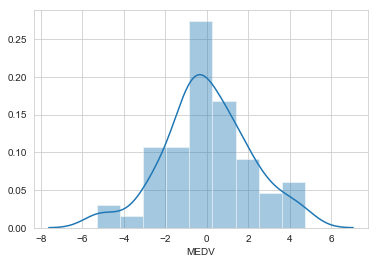

In [206]:
sns.distplot((y_test - y_pred))

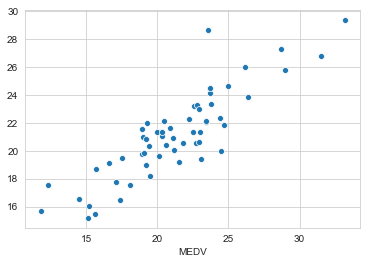

In [207]:
sns.scatterplot(y_test, y_pred)